In [1]:
from inference import *

/home/louis/anaconda3/envs/NST/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the model

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
# config of the best model, please don't change any of these! 
r = 16
target_modules = ["query", "value", "key", "dense"]
encoder_num_layers = 6
decoder_num_layers = 3
# download the model checkpoint and put the path here
model_path = ...

# lora config
lora_config_c = LoraConfig(
    r=r,
    lora_alpha=16,
    target_modules=target_modules,
    lora_dropout=0.1,
    bias="none",
)
lora_config_s = LoraConfig(
    r=r,
    lora_alpha=16,
    target_modules=target_modules,
    lora_dropout=0.1,
    bias="none",
)
# load the model
model = NST(encoder_num_layers=encoder_num_layers, decoder_num_layers=decoder_num_layers, freeze=True)
model.encoder_c = get_peft_model(model.encoder_c, lora_config_c)
model.encoder_s = get_peft_model(model.encoder_s, lora_config_s)
model.load_state_dict(torch.load(model_path, map_location=device))

<All keys matched successfully>

# Inference

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


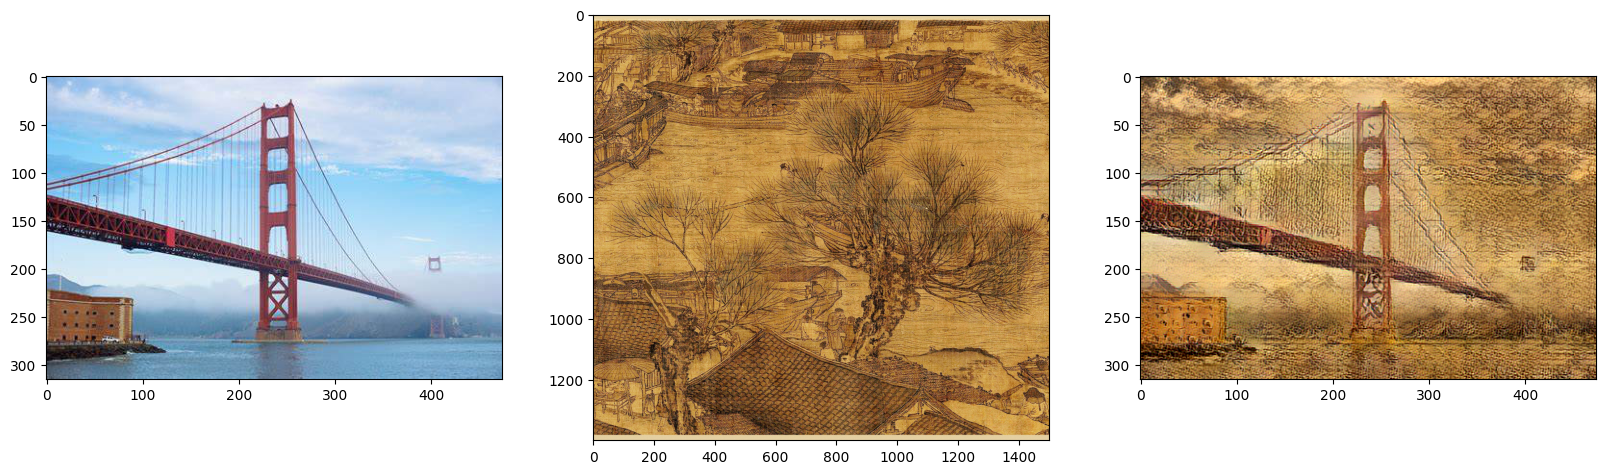

In [8]:
content_path = 'bridge.jpg'
style_path = 'Qingmingshanghetu.jpg'
Ig, Ic, Is = generate_image(model.to(device), content_path, style_path, device)